<a href="https://colab.research.google.com/github/GyaviWalls/Prediction-of-Product-Sales/blob/main/Project_1_Part_5_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Part 5 (Core)

> Author: Gyavira Ayebare.B

## imports and initial data cleansing

In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 50)

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [2]:
from sklearn import set_config
set_config(transform_output='pandas')

> For Part 5, going back to your original, uncleaned, sales prediction dataset with the goal of preventing data leakage.



In [3]:
fpath = "/content/drive/MyDrive/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv"
df = pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


> checking and dropping duplicates if existent

In [4]:
df.duplicated().sum()

0

> checking and fixing inconsistencies in categorical data

In [5]:
cat_cols = df.select_dtypes('object')
for col in cat_cols:
  print(df[col].value_counts())
  print()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Medium   

In [6]:
repl_dict = { 'LF': 'Low Fat',
              'low fat': 'Low Fat',
              'reg': 'Regular'}

df['Item_Fat_Content'].replace(repl_dict.keys(), repl_dict.values(), inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [7]:
### trial mode!
# df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

> Identifying the features (X) and target (y)


In [8]:
# examining cardinality of categorical features ...
(df[df.select_dtypes('object').columns].nunique() / df.shape[0]) *100

Item_Identifier         18.291681
Item_Fat_Content         0.023466
Item_Type                0.187727
Outlet_Identifier        0.117330
Outlet_Size              0.035199
Outlet_Location_Type     0.035199
Outlet_Type              0.046932
dtype: float64

In [9]:
y = df['Item_Outlet_Sales']

# drop the "Item_Identifier" feature because it has very high cardinality.
X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier'])

> Performing a train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Creating a preprocessing object to prepare the dataset for Machine Learning


In [11]:
# seeing for features with null values
print(X_train.isna().sum())
print('---------------------------------------------------------')
print(X_test.isna().sum())

Item_Weight                  1107
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1812
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64
---------------------------------------------------------
Item_Weight                  356
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  598
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64


In [12]:
num_cols = X_train.select_dtypes("number").columns

# Imputing with mean and scaling values
impute_mean = SimpleImputer(strategy='mean')

scaler = StandardScaler()

# Instantiate pipeline
num_pipe = make_pipeline(impute_mean, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [13]:
# Save a list of ordinal features
ord_cols = ['Outlet_Size', 'Outlet_Location_Type']

# Impute null values using SimpleImputer using
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

# Making the list of order lists for OrdinalEncoder
out_size_order = ['NA', 'Small', 'Medium', 'High']
out_loc_order = ['Tier 1', 'Tier 2', 'Tier 3']
ordinal_category_orders = [out_size_order, out_loc_order]

# using ordinalencoder and scaling the feature values
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
scaler_ord = StandardScaler()

# Instantiate the pipeline
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
ord_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['NA', 'Small', 'Medium', 'High'],
                                            ['Tier 1', 'Tier 2', 'Tier 3']])),
                ('standardscaler', StandardScaler())])

In [14]:
# Save a list of nominal features
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns

# Use OneHotEncoder to encode the features
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [15]:
num_tuple = ('numeric', num_pipe, num_cols)
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ohe_tuple = ('categorical', ohe_encoder, ohe_cols)

In [16]:
# Instantiate with verbose_feature_names_out=False
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                    verbose_feature_names_out=False)

In [17]:
# Fit on training data
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEn...egories=[['NA',
                                                                              'Small',
                                                                              'Medium',
                                                                              'High'],
                                                                             ['Tier '
                                                                              '1',
                                                                              'Tier '
                                                                              '2',
                                                                              'Tier '
                                                                              '3']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size', 'Outlet_Location_Type']),
                                ('categorical',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

In [18]:
X_train_processed = col_transformer.transform(X_train)
X_test_processed = col_transformer.transform(X_test)


## Verifying feature scaling...

In [19]:
def check_scale(df, df_tf, feat):
  fig, axes = plt.subplots(nrows=2)

  # plot the original unscaled data
  sns.histplot(data=df, x=feat, ax=axes[0])
  axes[0].set_title('Original Data');

  # plot the scaled/transformed data
  sns.histplot(data=df_tf, x=feat, ax=axes[1], color='green');
  axes[1].set_title('Scaled Data');
  fig.tight_layout();

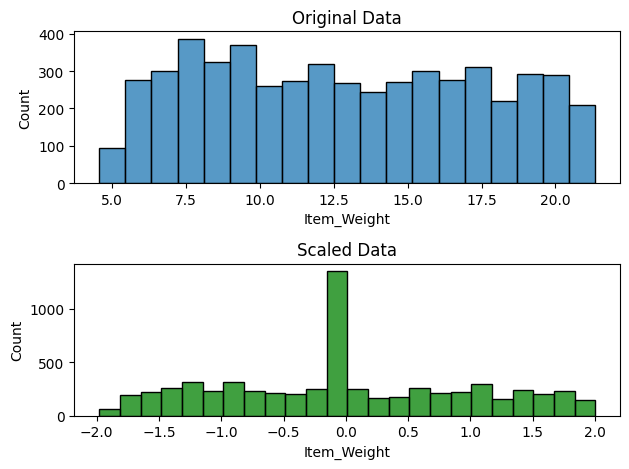

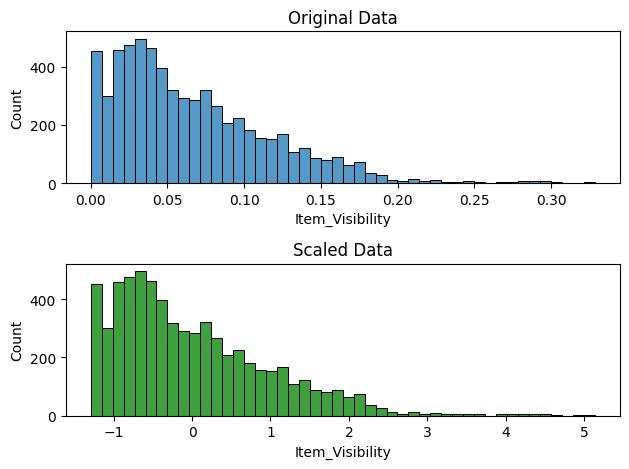

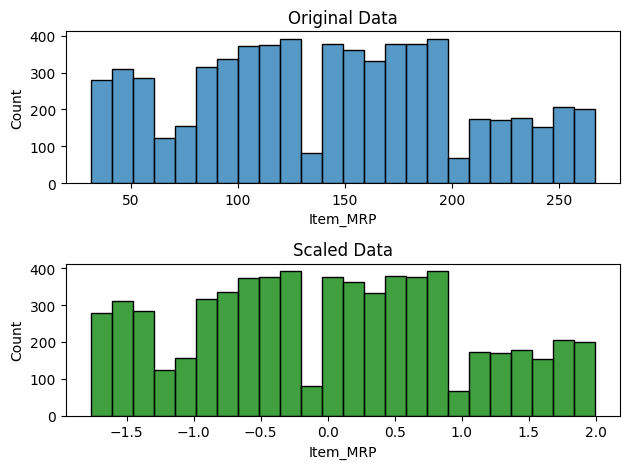

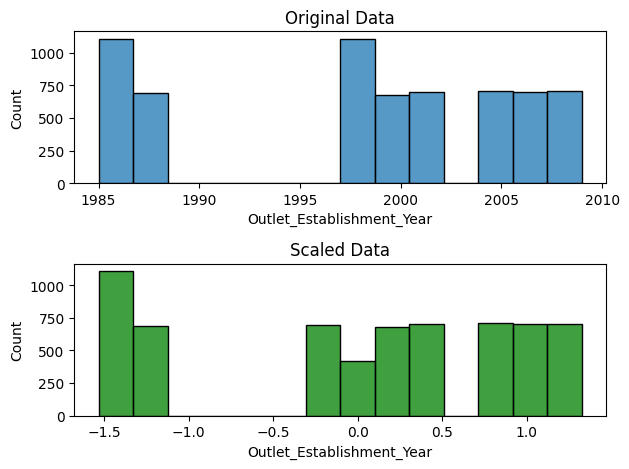

In [20]:
for col in num_cols:
  check_scale(X_train, X_train_processed, col);

In [21]:
corr_df = X_train.corr(numeric_only=True) - X_train_processed[num_cols].corr(numeric_only=True)
corr_df[corr_df != 0]

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,NaN,-2.304640e-03,1.983073e-03,-1.585989e-03
Item_Visibility,-0.002305,NaN,3.686287e-17,-2.595146e-15
Item_MRP,0.001983,3.686287e-17,NaN,-2.017483e-15
Outlet_Establishment_Year,-0.001586,-2.595146e-15,-2.017483e-15,NaN


**Questionable features**

*Item_Weight ?*

*Outlet_Establishment_Year ?*